**Pizza Sales Analysis**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

**Import Data Libraries**

In [5]:
df = pd.read_csv("/content/pizza_sales.csv")

**Raw Data**



In [6]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [7]:
print("The Metadata Of The Dataset :  ", df.shape)

The Metadata Of The Dataset :   (48620, 12)


**KPI**

In [8]:
total_revenue = df["total_price"].sum()
total_pizza_sold = df["quantity"].sum()
total_orders = df["order_id"].nunique()
avg_order_value = total_revenue / total_orders
avg_pizza_per_order = total_pizza_sold / total_orders

print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Total Pizza Sold: {total_pizza_sold}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: ${avg_order_value:.2f}")
print(f"Average Pizzas Per Order: {avg_pizza_per_order:.2f}")


Total Revenue: $817860.05
Total Pizza Sold: 49574
Total Orders: 21350
Average Order Value: $38.31
Average Pizzas Per Order: 2.32


**Chart**

**Ingredient Analysis**

In [9]:
ingredient = (
              df['pizza_ingredients']
              .str.split(",")
              .explode()
              .value_counts()
              .reset_index()
              .rename(columns={'index': 'Count', 'pizza_ingredients': 'Ingredients'})
    )
print(ingredient.head(10))

          Ingredients  count
0              Garlic  27422
1            Tomatoes  23694
2          Red Onions  19547
3         Red Peppers  16284
4             Chicken   8443
5           Mushrooms   8114
6   Mozzarella Cheese   6605
7           Pepperoni   6542
8        Green Olives   6174
9          Artichokes   5682


**Daily Trend - Total Orders**

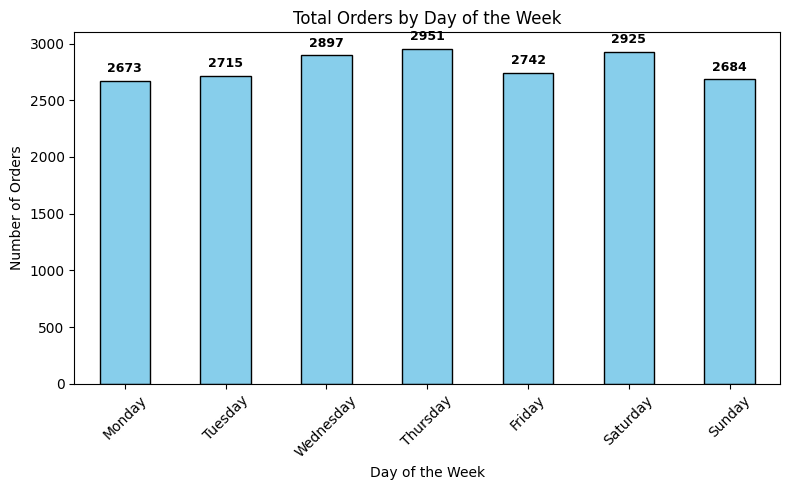

In [10]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

ordered_by_day = df.groupby('day_name', observed=False)['order_id'].count()

ax = ordered_by_day.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')

plt.title('Total Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

for i, val in enumerate(ordered_by_day):
    plt.text(i, val + 50, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


**Daily Trend - Total Revenue**

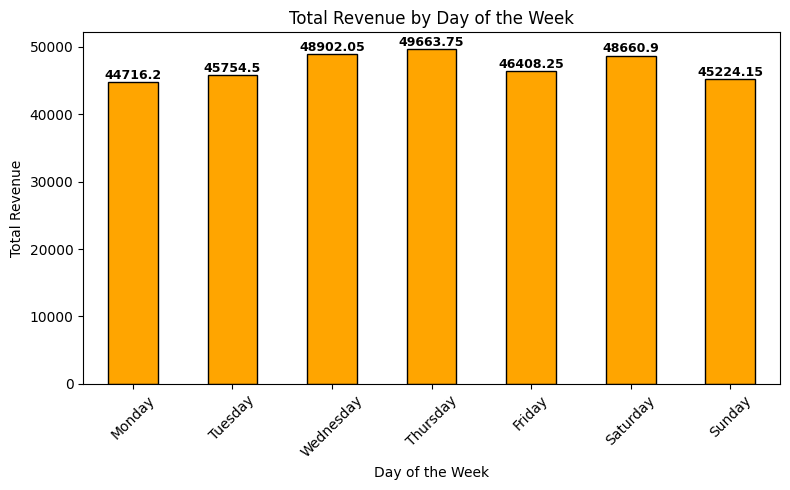

In [11]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

ordered_by_day = df.groupby('day_name', observed=False)['total_price'].sum()

ax = ordered_by_day.plot(kind='bar', figsize=(8,5), color='orange', edgecolor='black')

plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

for i, val in enumerate(ordered_by_day):
    plt.text(i, val + 50, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


**Hourly Trend - Total Order**

/tmp/ipython-input-2489841593.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')


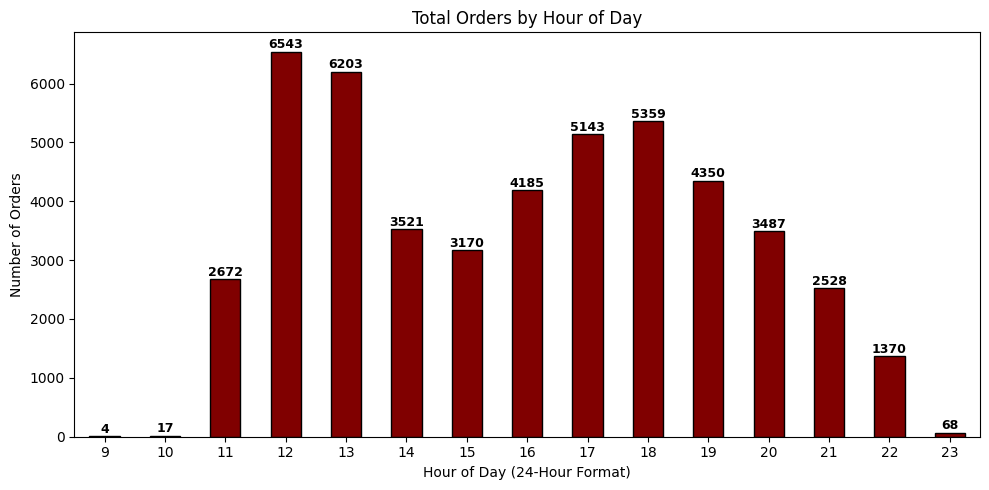

In [12]:
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')
df = df.dropna(subset=['order_time'])

df['order_hour'] = df['order_time'].dt.hour
orders_by_hour = df.groupby('order_hour')['order_id'].count()

plt.figure(figsize=(10,5))
ax = orders_by_hour.plot(kind='bar', color='maroon', edgecolor='black')

plt.title("Total Orders by Hour of Day")
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

**Monthly Trend - Total Orders**

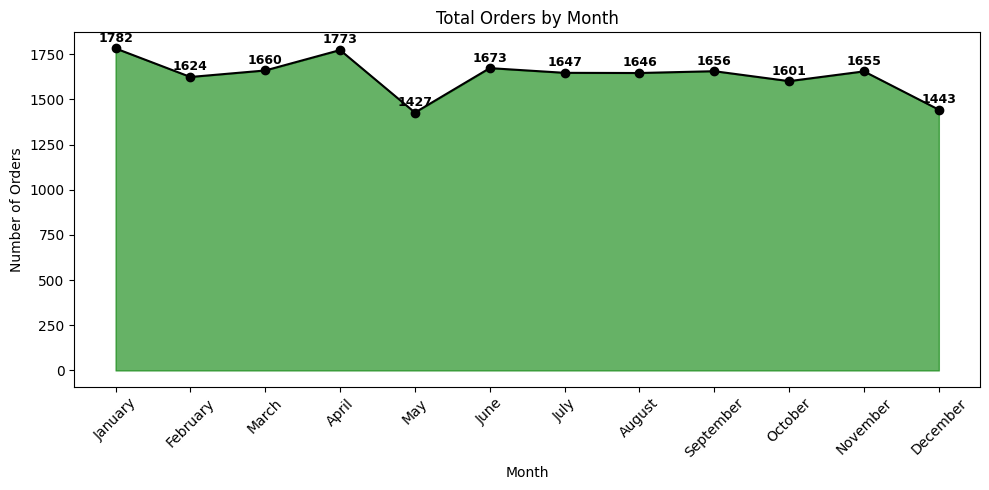

In [13]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

df['month_name'] = df['order_date'].dt.month_name()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

ordered_by_month = df.groupby('month_name', observed=False)['order_id'].count()

plt.figure(figsize=(10,5))
plt.fill_between(ordered_by_month.index,ordered_by_month.values, color='green', alpha=0.6)
plt.plot(ordered_by_month.index, ordered_by_month.values, color='black', marker='o')

plt.title('Total Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

for i, val in enumerate(ordered_by_month):
  plt.text(i, val + 20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()



**`% Of Sales By Category`**

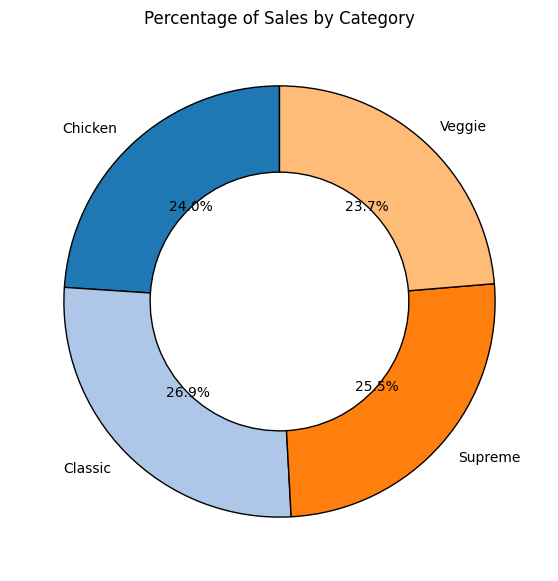

In [15]:
category_sales = df.groupby('pizza_category')['total_price'].sum()
category_pct = category_sales/category_sales.sum() * 100

plt.figure(figsize=(7,7))
colors = plt.get_cmap('tab20').colors

plt.pie(
    category_pct,
    labels=category_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor':'black', 'width':0.4}
)

plt.title('Percentage of Sales by Category')
plt.show()


**`% Sales By Pizza Size & Category`**

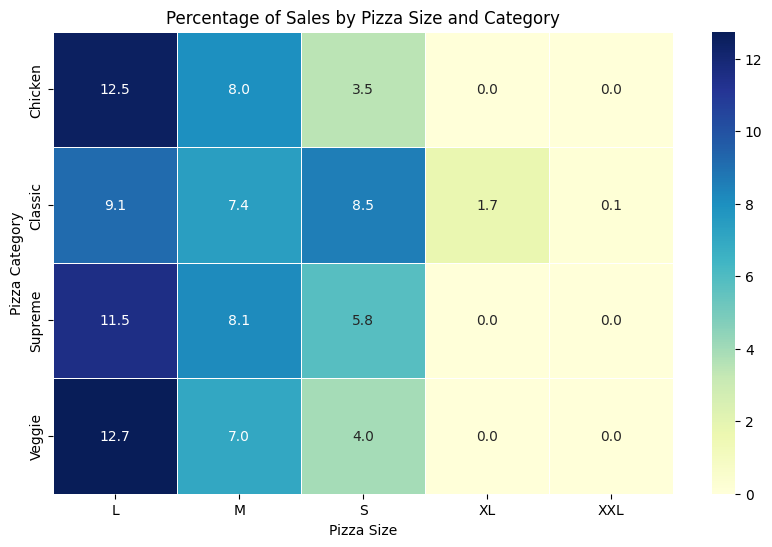

In [18]:
sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

sales_pivot_pct = sales_pivot / sales_pivot.sum().sum() * 100

plt.figure(figsize=(10,6))
sns.heatmap(sales_pivot_pct, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)
plt.title('Percentage of Sales by Pizza Size and Category')
plt.ylabel('Pizza Category')
plt.xlabel('Pizza Size')
plt.show()

**Total Pizza Sold By Pizza Category**

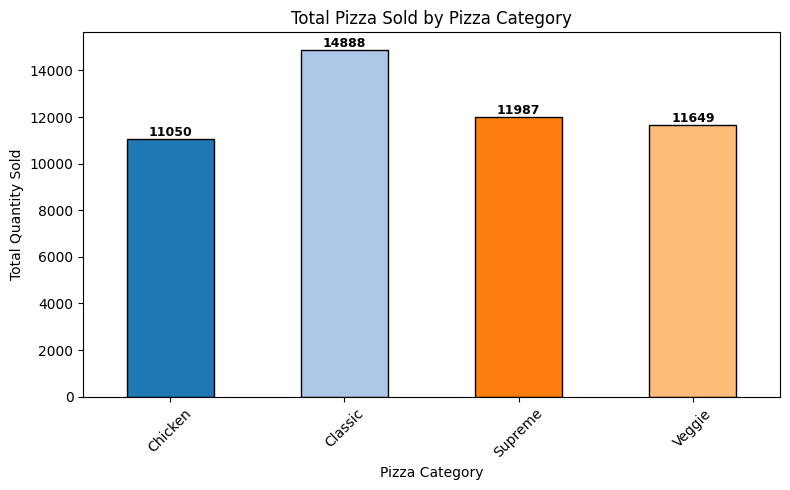

In [19]:
pizza_by_category = df.groupby('pizza_category')['quantity'].sum()

colors = list(plt.get_cmap('tab20').colors)

colors = colors[:len(pizza_by_category)]

ax = pizza_by_category.plot(
    kind='bar', figsize=(8,5), color=colors, edgecolor='black'
)

plt.title('Total Pizza Sold by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)

for i, val in enumerate(pizza_by_category):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


**Top 5 Best Selling Pizzas - Total Orders**



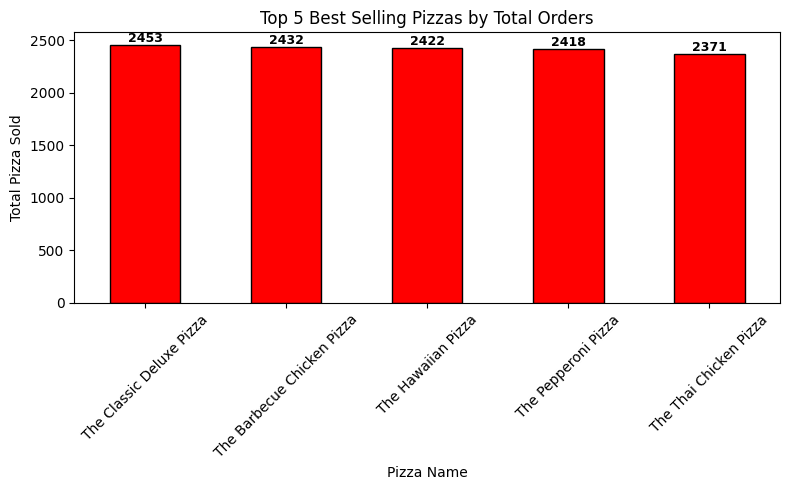

In [20]:
pizza_by_name = df.groupby('pizza_name')['quantity'].sum()

top5 = pizza_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind='bar', figsize=(8,5), color='red', edgecolor='black')

plt.title('Top 5 Best Selling Pizzas by Total Orders')
plt.xlabel('Pizza Name')
plt.ylabel('Total Pizza Sold')
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

**Top 5 Best Selling Pizzas - Total Sales


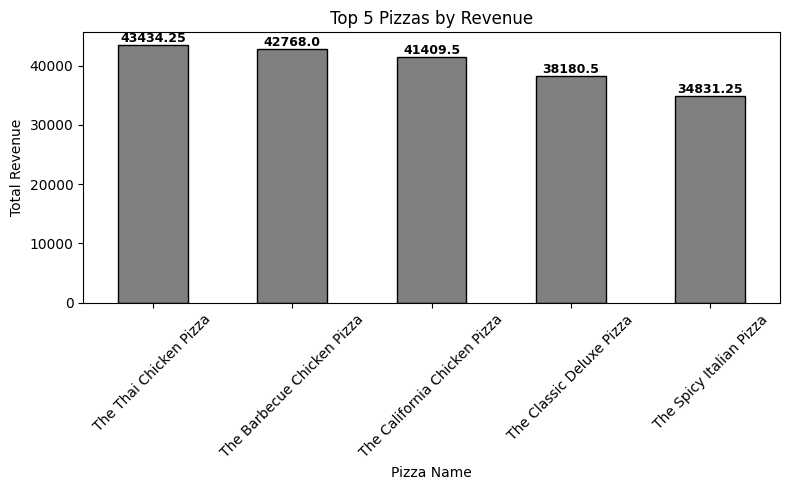

In [24]:
pizza_by_name = df.groupby('pizza_name')['total_price'].sum()

top5 = pizza_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind='bar', figsize=(8,5), color='grey', edgecolor='black')

plt.title('Top 5 Pizzas by Revenue')
plt.xlabel('Pizza Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

**Bottom 5 Best Selling Pizzas - Total Sales**


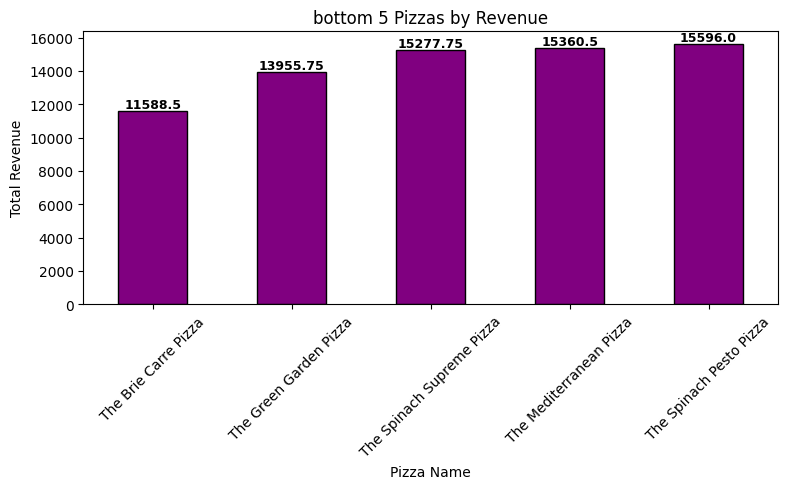

In [25]:
pizza_by_name = df.groupby('pizza_name')['total_price'].sum()

bottom5 = pizza_by_name.sort_values(ascending=True).head(5)

ax = bottom5.plot(kind='bar', figsize=(8,5), color='purple', edgecolor='black')

plt.title('bottom 5 Pizzas by Revenue')
plt.xlabel('Pizza Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

for i, val in enumerate(bottom5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()